<a href="https://www.kaggle.com/barzcan/red-wine-quality-eda-and-machine-learning?scriptVersionId=88413227" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Table of Contents

## 1-Data Visualization Part:
* [Histograms](#1)
* [Countplot](#2)
* [Correlation Map](#3)
* [Pairplot](#4)
* [Catplots](#5)
* [Pointplot](#6)
* [3D Scatterplot](#7)

## 2-Machine Learning Part:
* [Feature Selection](#8)
* [Cross Validation](#10)



# Descriptions

* fixed acidity: most acids involved with wine or fixed or nonvolatile (do not evaporate readily)
* volatile acidity:the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste
* citric acid:found in small quantities, citric acid can add 'freshness' and flavor to wines
* residual sugar:the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet
* chlorides:the amount of salt in the wine
* free sulfur dioxide:the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine
* total sulfur dioxide:amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine
* densitythe density of water is close to that of water depending on the percent alcohol and sugar content
* pH:describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale
* sulphates: a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant
* alcohol:the percent alcohol content of the wine
* quality: output variable (based on sensory data, score between 0 and 10)

In [1]:
import numpy as np # Numerical Python
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
from plotly.offline import iplot
import plotly.offline as py
py.init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings('ignore') 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
sns.set()

/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv


In [2]:
dataset=pd.read_csv('/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv')
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


# 1- Data Visualization Part

<a id="1"></a><br>
## Histograms

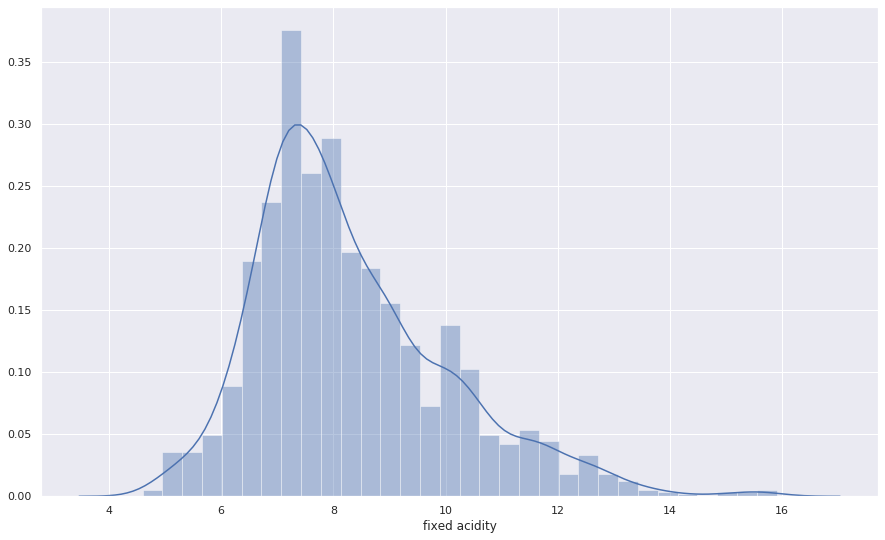

In [5]:
plt.figure(figsize=(15,9))
sns.distplot(dataset['fixed acidity'])
plt.show()

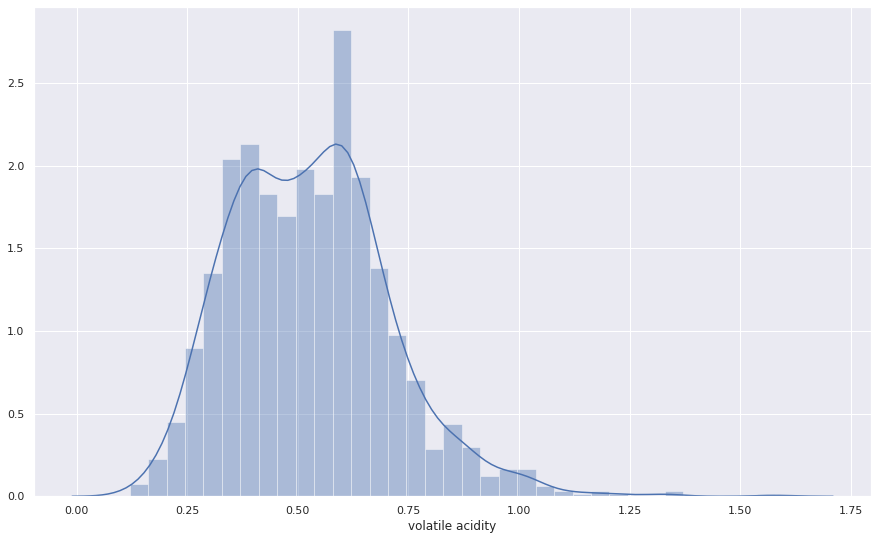

In [6]:
plt.figure(figsize=(15,9))
sns.distplot(dataset['volatile acidity'])
plt.show()

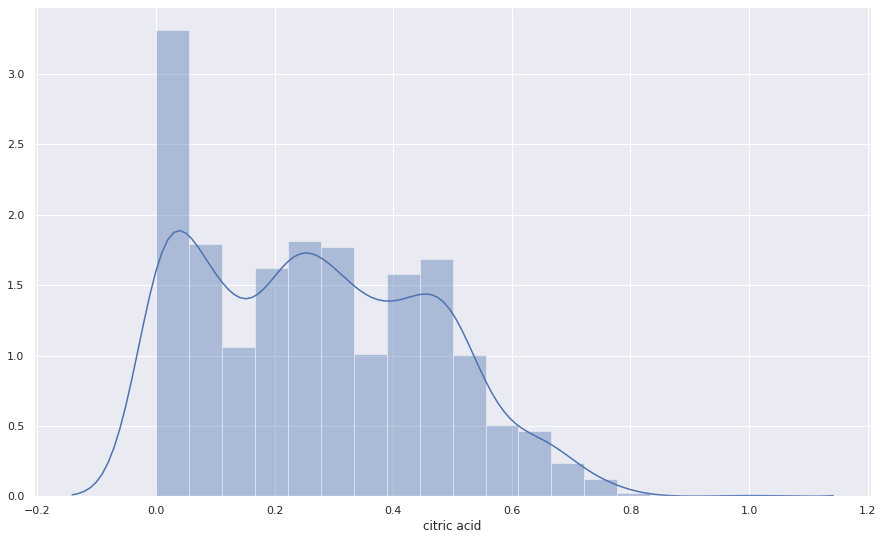

In [7]:
plt.figure(figsize=(15,9))
sns.distplot(dataset['citric acid'])
plt.show()

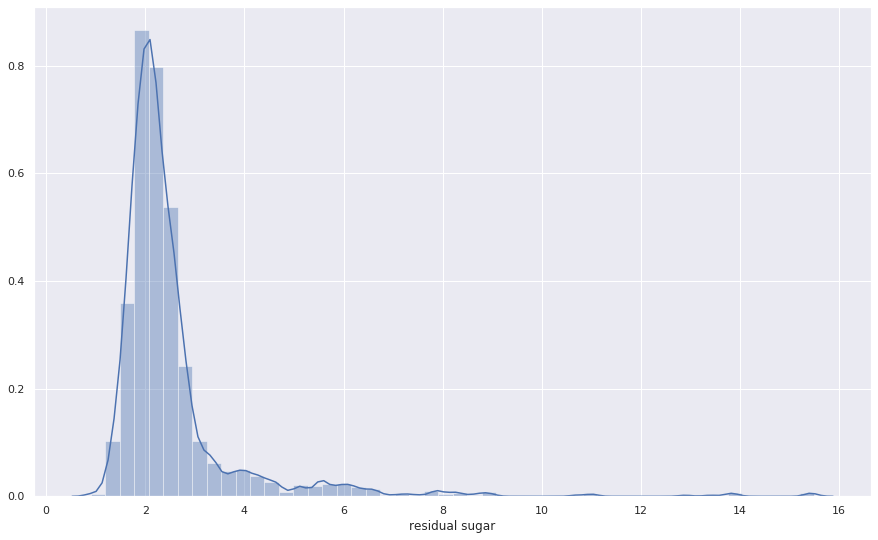

In [8]:
plt.figure(figsize=(15,9))
sns.distplot(dataset['residual sugar'])
plt.show()

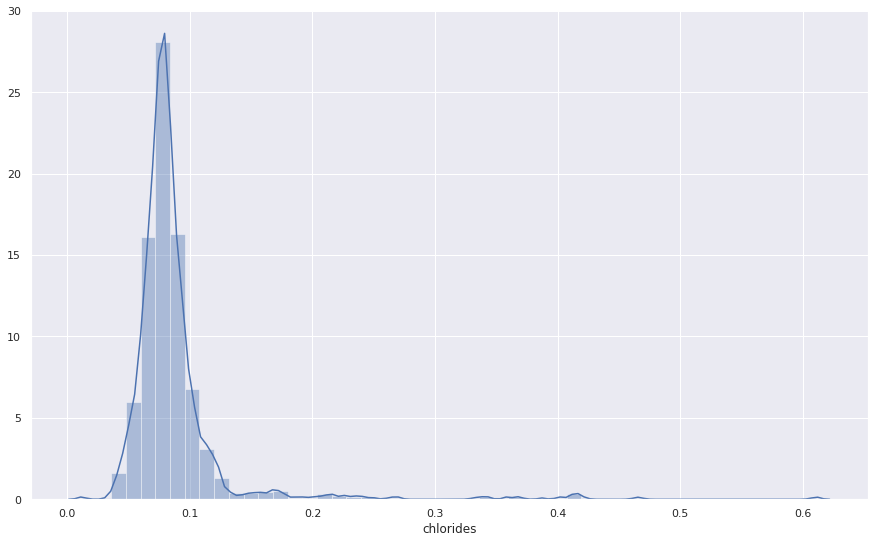

In [9]:
plt.figure(figsize=(15,9))
sns.distplot(dataset['chlorides'])
plt.show()

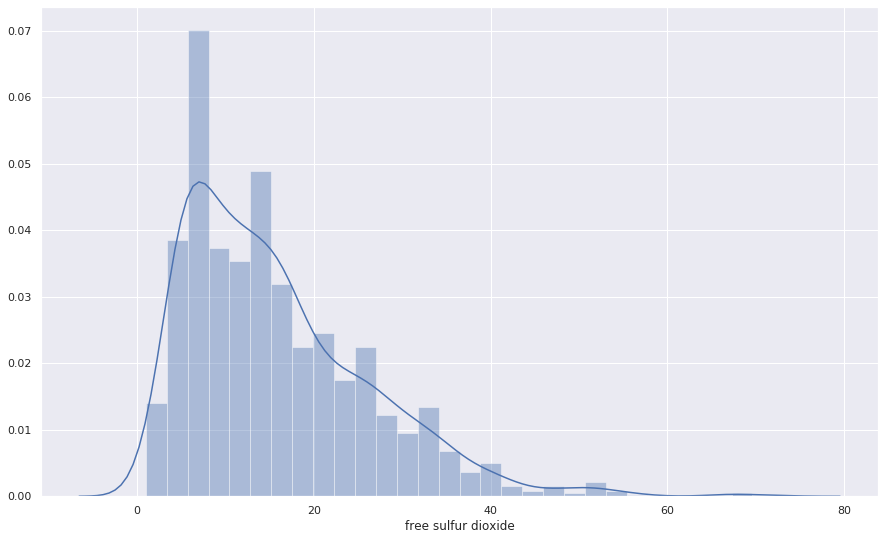

In [10]:
plt.figure(figsize=(15,9))
sns.distplot(dataset['free sulfur dioxide'])
plt.show()

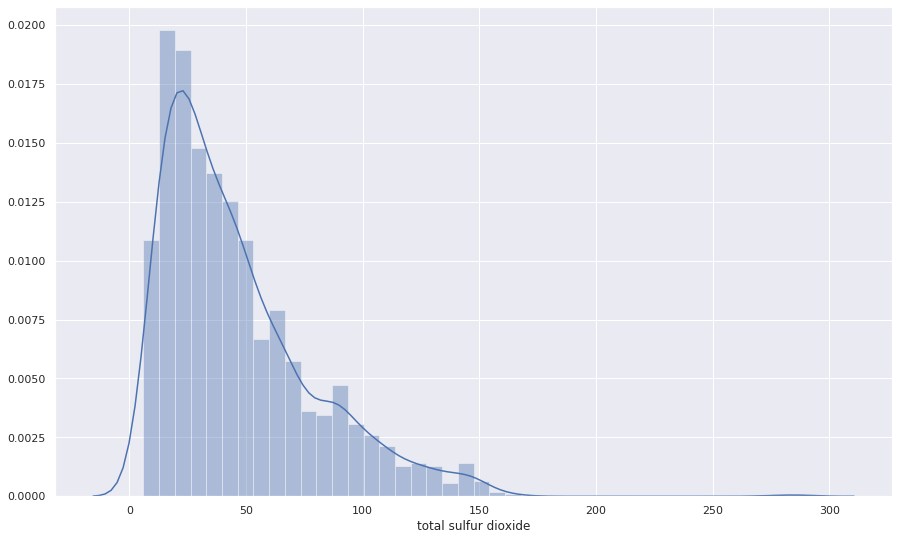

In [11]:
plt.figure(figsize=(15,9))
sns.distplot(dataset['total sulfur dioxide'])
plt.show()

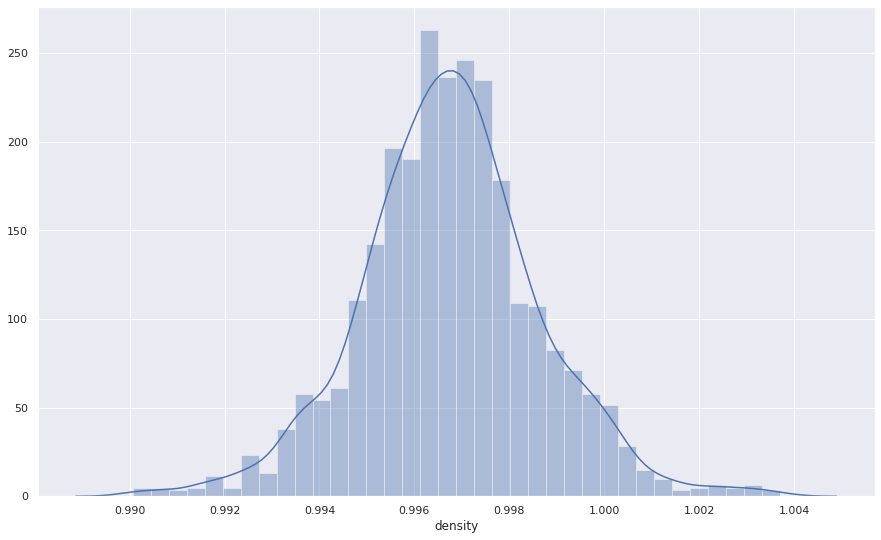

In [12]:
plt.figure(figsize=(15,9))
sns.distplot(dataset['density'])
plt.show()

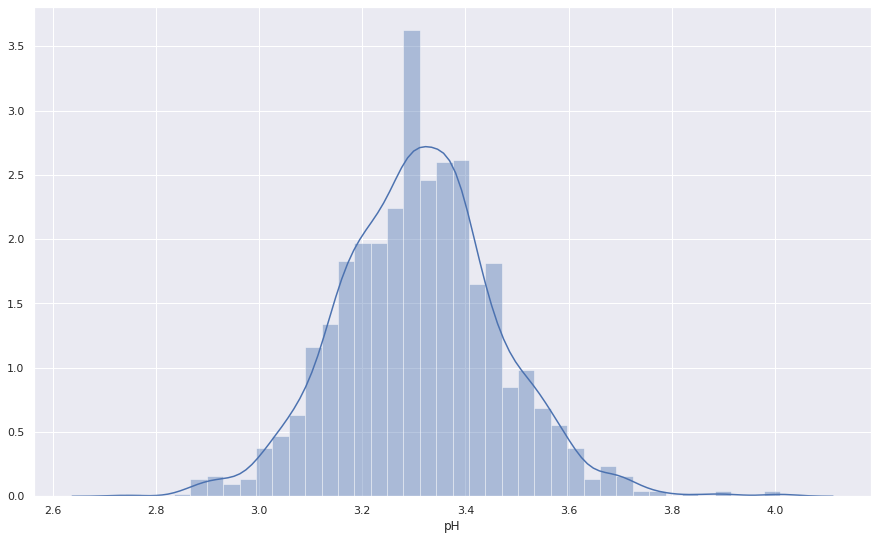

In [13]:
plt.figure(figsize=(15,9))
sns.distplot(dataset['pH'])
plt.show()

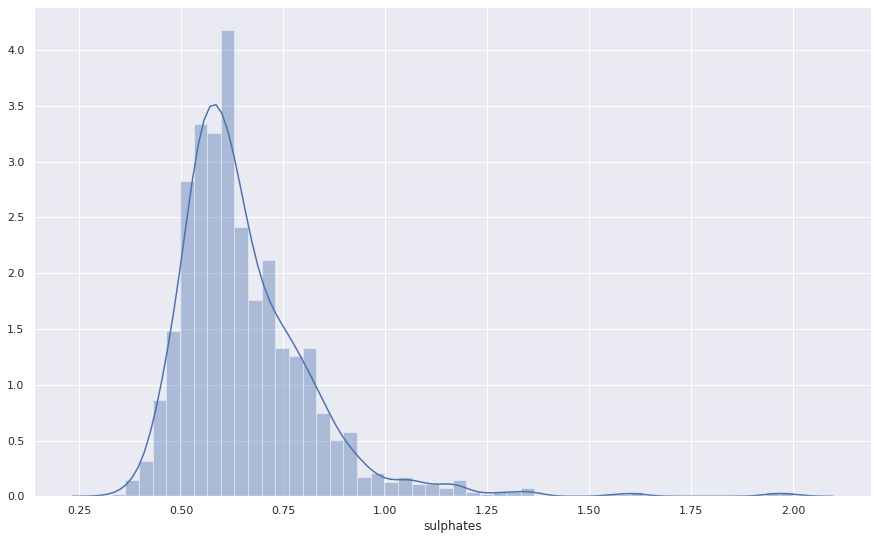

In [14]:
plt.figure(figsize=(15,9))
sns.distplot(dataset['sulphates'])
plt.show()

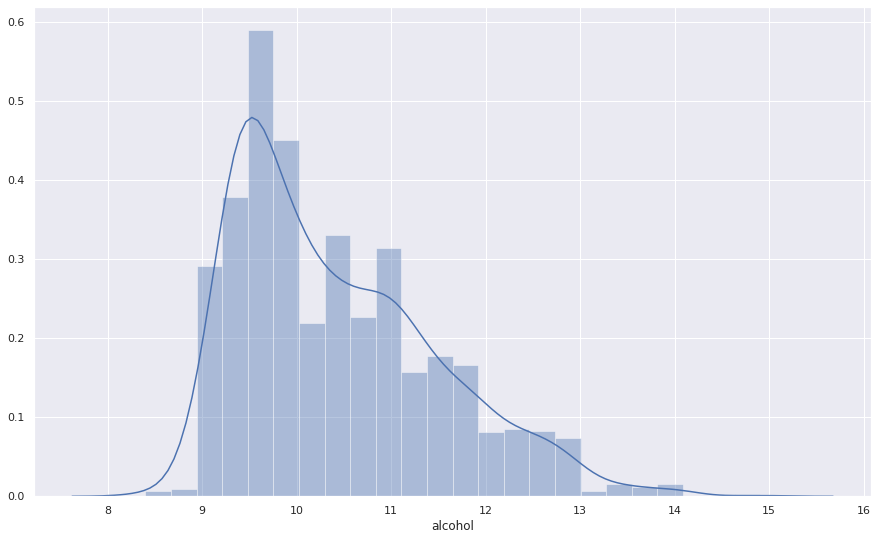

In [15]:
plt.figure(figsize=(15,9))
sns.distplot(dataset['alcohol'])
plt.show()

<a id="2"></a><br>
## Countplot

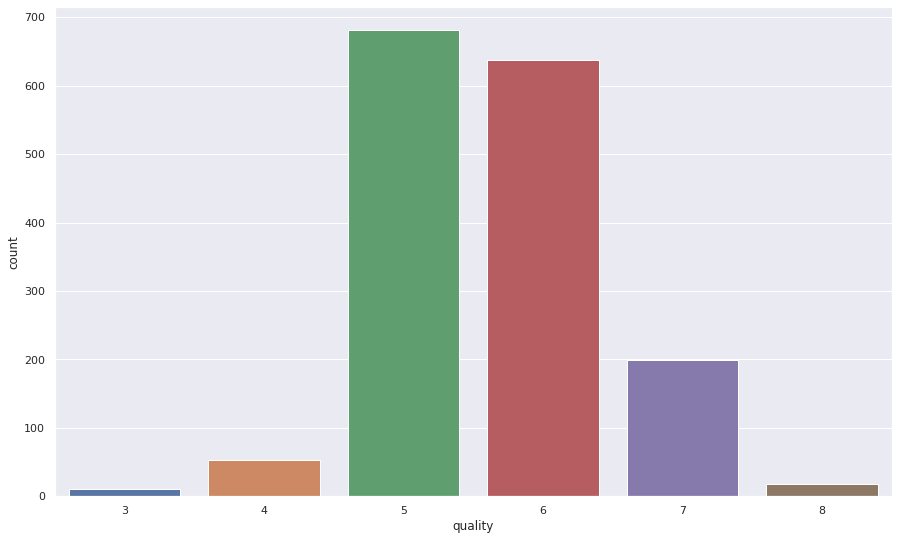

In [16]:
plt.figure(figsize=(15,9))
sns.countplot(dataset['quality'])
plt.show()

<a id="3"></a><br>
## Correlation Map

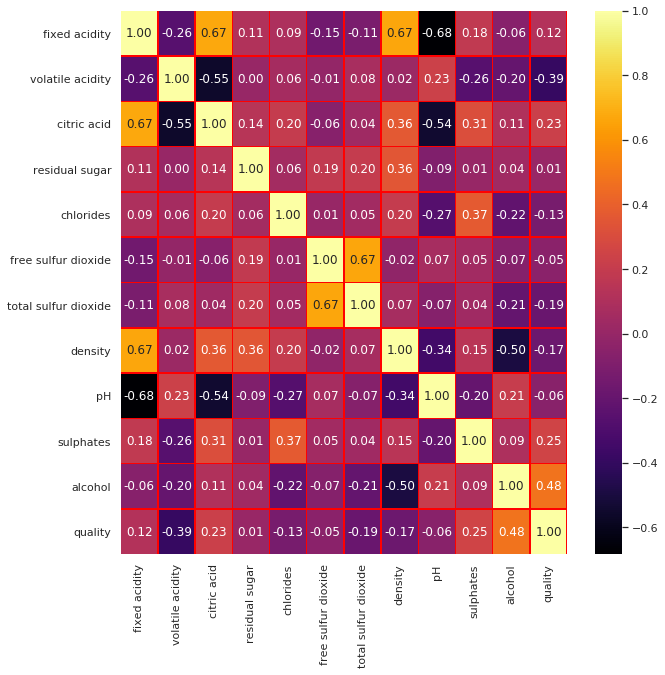

In [17]:
#Correlation Heatmap
corelation_matrix=dataset.corr()
fig,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corelation_matrix, annot=True, linewidths=0.5,linecolor="red", fmt= '.2f',ax=ax,cmap='inferno')
plt.show()

<a id="4"></a><br>
## Pairplot

<Figure size 1080x648 with 0 Axes>

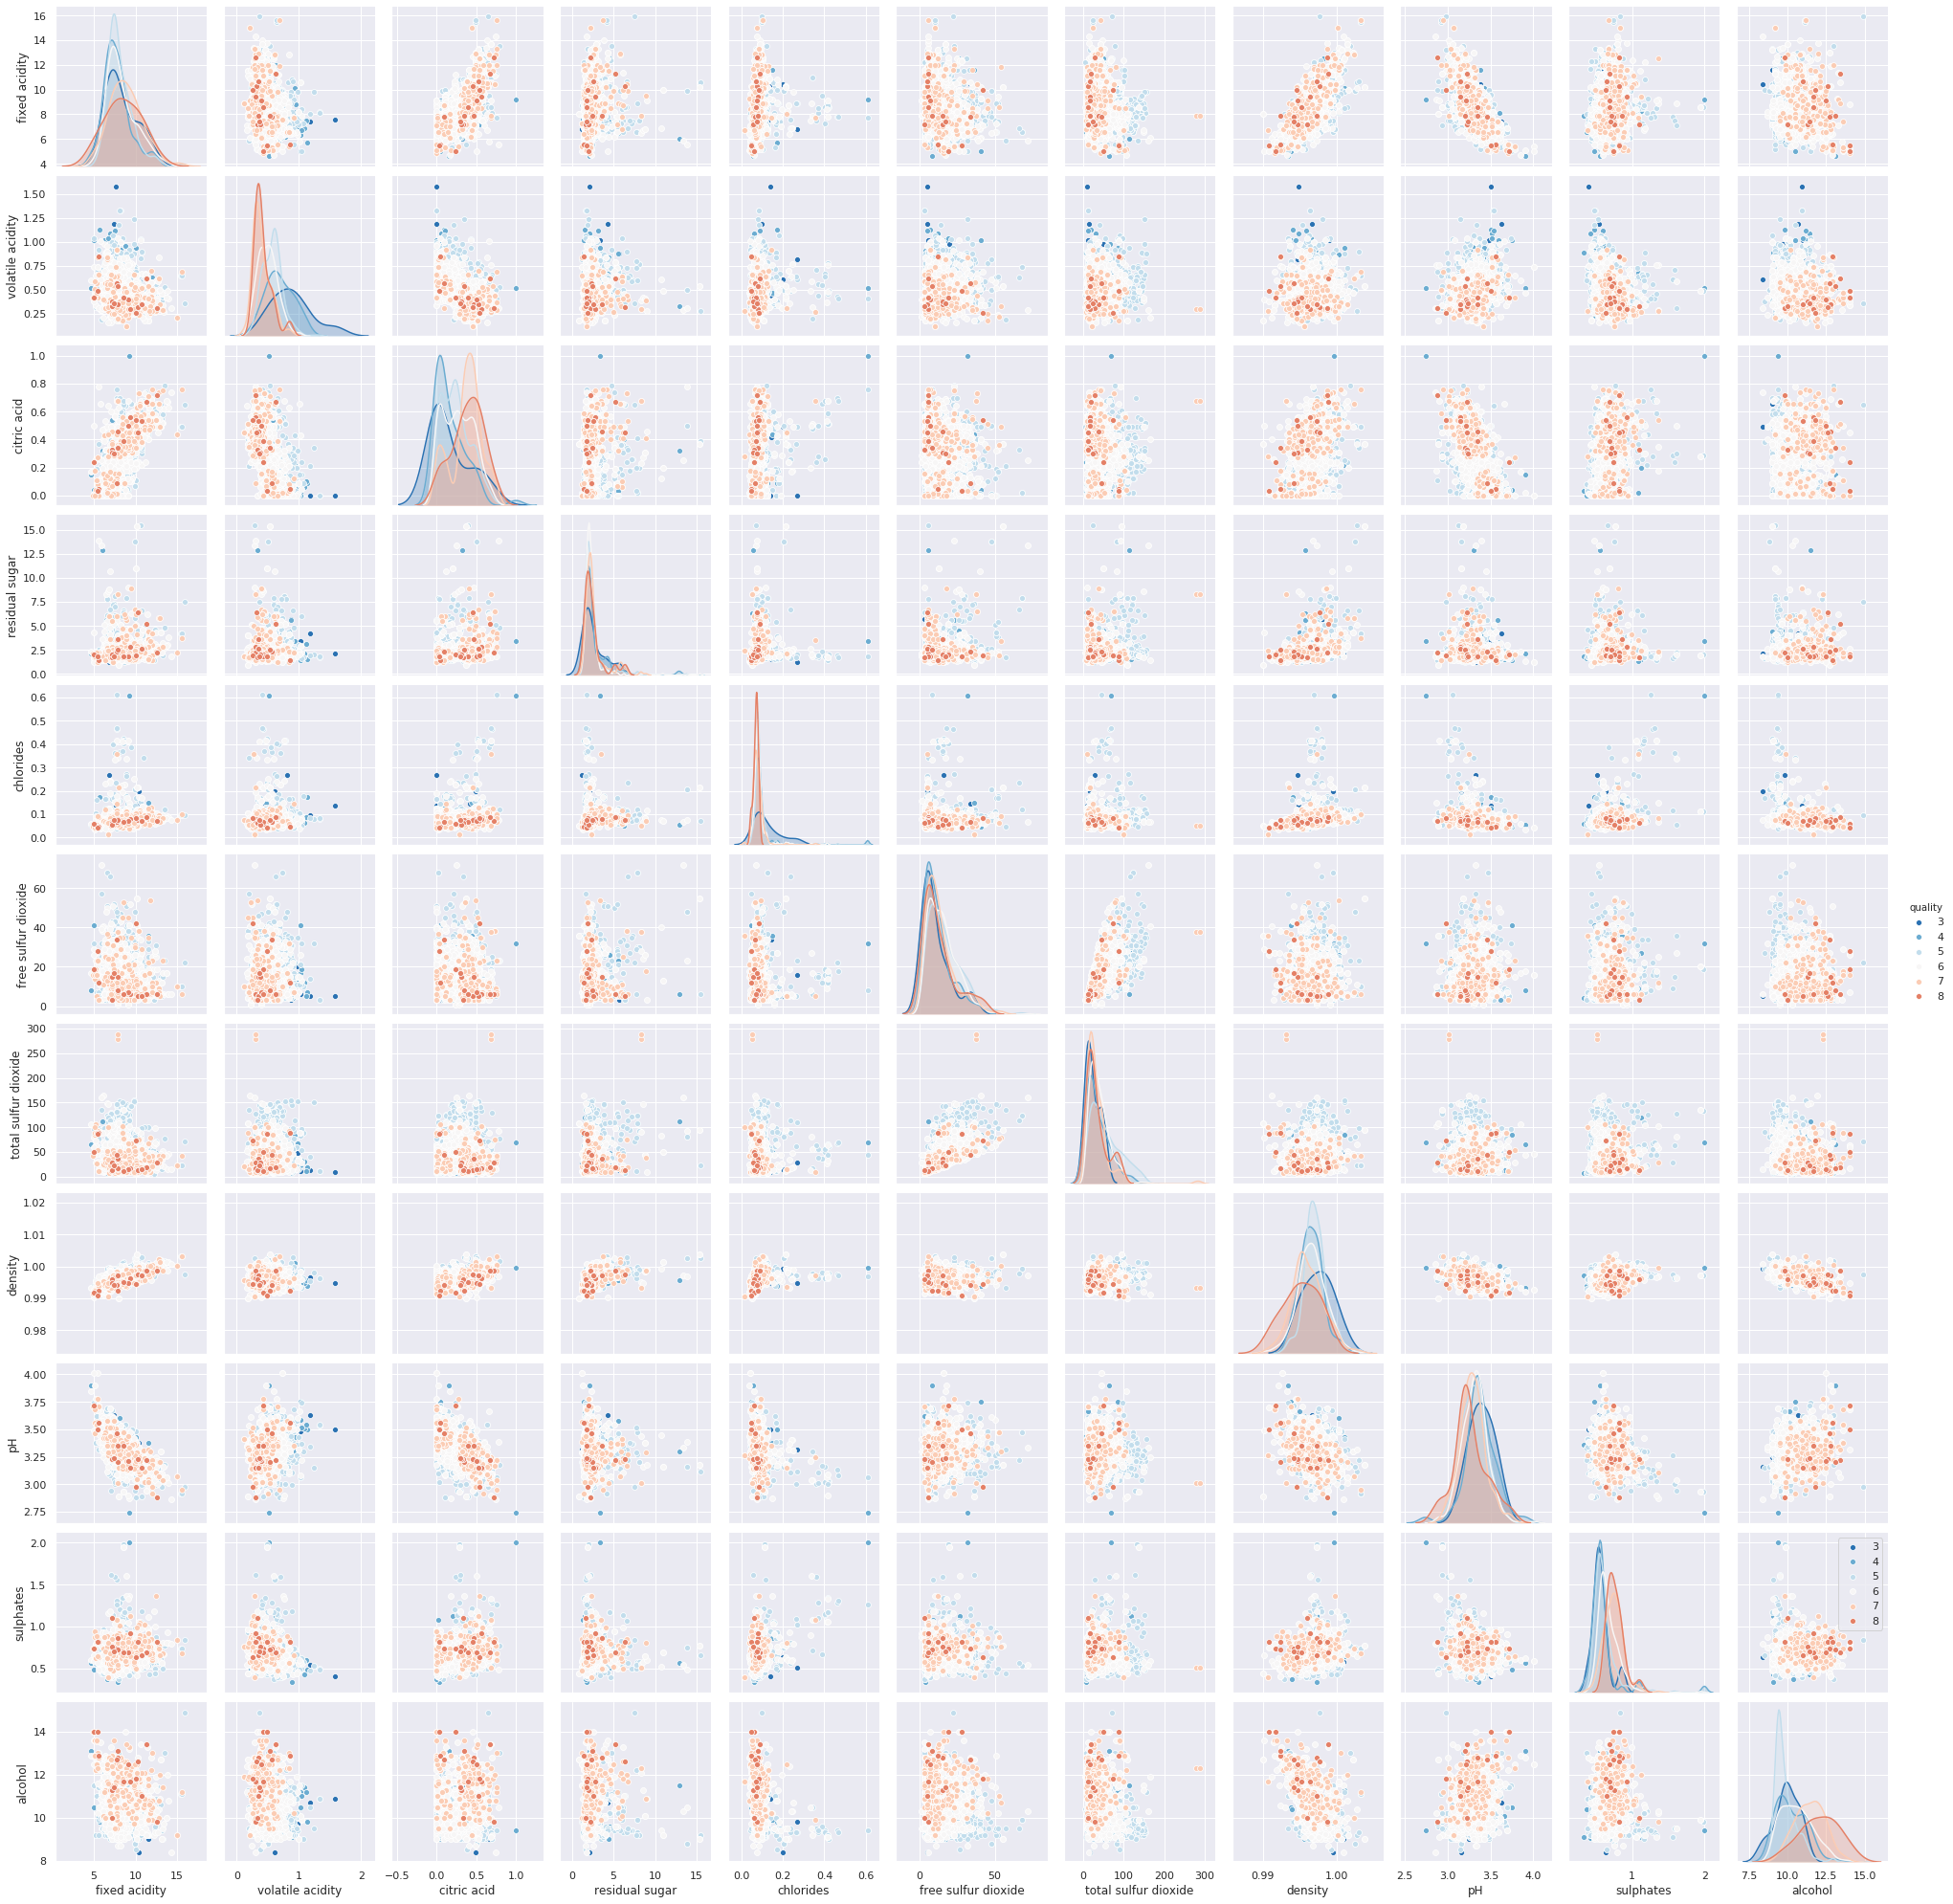

In [18]:
plt.figure(figsize=(15,9))
sns.pairplot(dataset,hue="quality",palette=sns.color_palette("RdBu_r", 7))
plt.legend()
plt.show()

<a id="5"></a><br>
## Catplots

In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


<Figure size 1080x648 with 0 Axes>

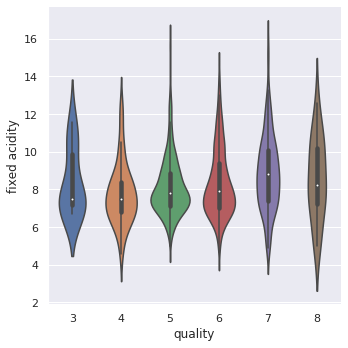

In [20]:
plt.figure(figsize=(15,9))
sns.catplot(x="quality", y="fixed acidity", data=dataset,kind='violin')
plt.show()

<Figure size 1080x648 with 0 Axes>

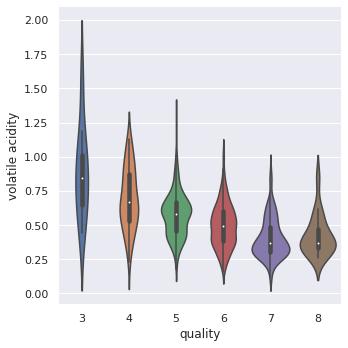

In [21]:
plt.figure(figsize=(15,9))
sns.catplot(x="quality", y="volatile acidity", data=dataset,kind='violin')
plt.show()

<Figure size 1080x648 with 0 Axes>

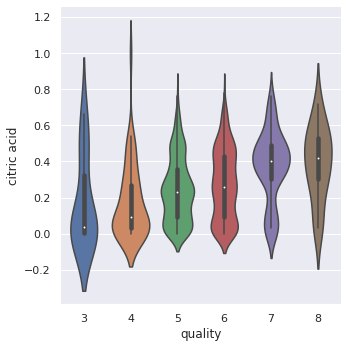

In [22]:
plt.figure(figsize=(15,9))
sns.catplot(x="quality", y="citric acid", data=dataset,kind='violin')
plt.show()

<Figure size 720x720 with 0 Axes>

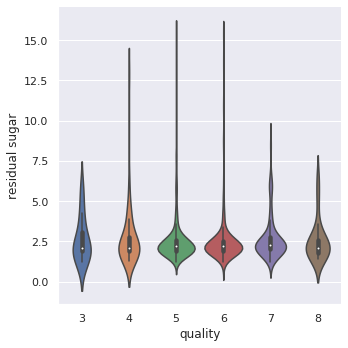

In [23]:
plt.figure(figsize=(10,10))
sns.catplot(x="quality", y="residual sugar", data=dataset,kind='violin')
plt.show()

<Figure size 720x720 with 0 Axes>

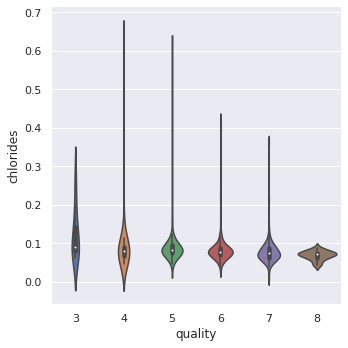

In [24]:
plt.figure(figsize=(10,10))
sns.catplot(x="quality", y="chlorides", data=dataset,kind='violin')
plt.show()

<Figure size 720x720 with 0 Axes>

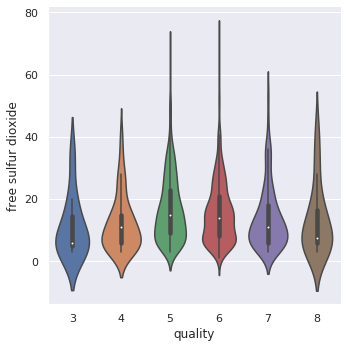

In [25]:
plt.figure(figsize=(10,10))
sns.catplot(x="quality", y="free sulfur dioxide", data=dataset,kind='violin')
plt.show()

<Figure size 720x720 with 0 Axes>

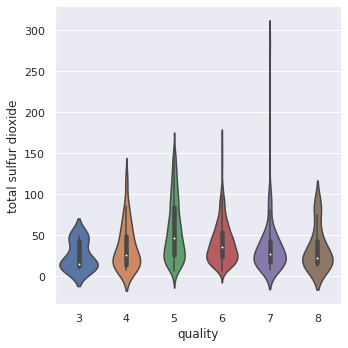

In [26]:
plt.figure(figsize=(10,10))
sns.catplot(x="quality", y="total sulfur dioxide", data=dataset,kind='violin')
plt.show()

<Figure size 720x720 with 0 Axes>

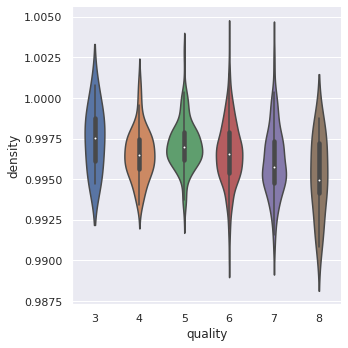

In [27]:
plt.figure(figsize=(10,10))
sns.catplot(x="quality", y="density", data=dataset,kind='violin')
plt.show()

<Figure size 720x720 with 0 Axes>

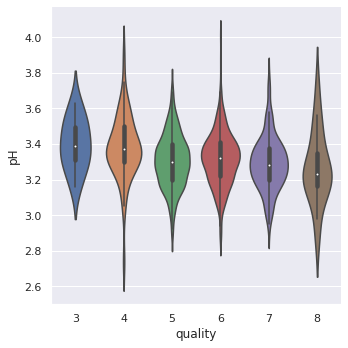

In [28]:
plt.figure(figsize=(10,10))
sns.catplot(x="quality", y="pH", data=dataset,kind='violin')
plt.show()

<Figure size 720x720 with 0 Axes>

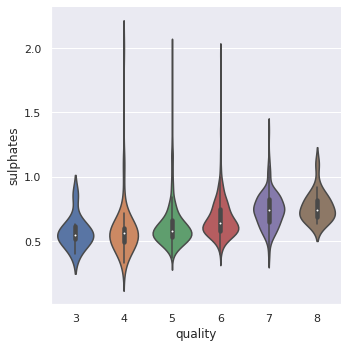

In [29]:
plt.figure(figsize=(10,10))
sns.catplot(x="quality", y="sulphates", data=dataset,kind='violin')
plt.show()

<Figure size 720x720 with 0 Axes>

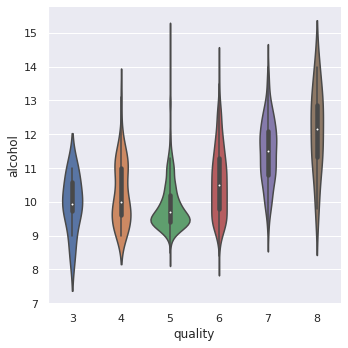

In [30]:
plt.figure(figsize=(10,10))
sns.catplot(x="quality", y="alcohol", data=dataset,kind='violin')
plt.show()

<a id="6"></a><br>
## Pointplot

In [31]:
#Normalizing the data
normalized_data=dataset.copy()
for column in normalized_data.columns:
    normalized_data[column]=normalized_data[column]/normalized_data[column].max()
    
normalized_data=normalized_data.round(3)
normalized_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.465,0.443,0.00,0.123,0.124,0.153,0.118,0.994,0.875,0.280,0.631,0.625
1,0.491,0.557,0.00,0.168,0.160,0.347,0.232,0.993,0.798,0.340,0.658,0.625
2,0.491,0.481,0.04,0.148,0.151,0.208,0.187,0.993,0.813,0.325,0.658,0.625
3,0.704,0.177,0.56,0.123,0.123,0.236,0.208,0.994,0.788,0.290,0.658,0.750
4,0.465,0.443,0.00,0.123,0.124,0.153,0.118,0.994,0.875,0.280,0.631,0.625


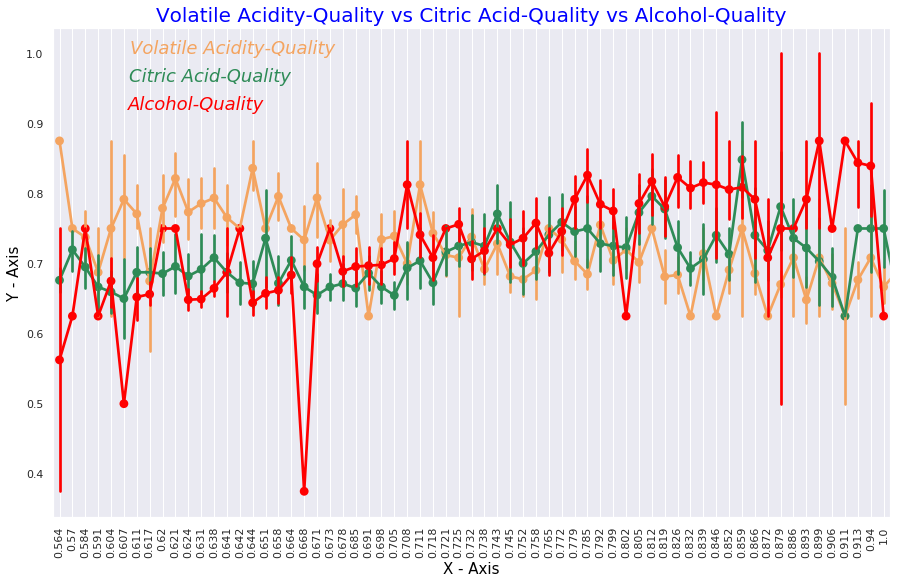

In [32]:
fig,ax1 = plt.subplots(figsize =(15,9))
sns.pointplot(x=normalized_data['volatile acidity'],y=normalized_data['quality'],data=normalized_data,color='sandybrown',alpha=0.7)
sns.pointplot(x=normalized_data['citric acid'],y=normalized_data['quality'],data=normalized_data,color='seagreen',alpha=0.6)
sns.pointplot(x=normalized_data['alcohol'],y=normalized_data['quality'],data=normalized_data,color='red',alpha=0.6)
plt.xticks(rotation=90)
plt.text(5.5,1,'Volatile Acidity-Quality',color='sandybrown',fontsize = 18,style = 'italic')
plt.text(5.4,0.96,'Citric Acid-Quality',color='seagreen',fontsize = 18,style = 'italic')
plt.text(5.3,0.92,'Alcohol-Quality',color='red',fontsize = 18,style = 'italic')
plt.xlabel('X - Axis',fontsize = 15,color='black')
plt.ylabel('Y - Axis',fontsize = 15,color='black')
plt.title('Volatile Acidity-Quality vs Citric Acid-Quality vs Alcohol-Quality',fontsize = 20,color='blue')
plt.grid()

<a id="7"></a><br>
## 3D Scatterplot

In [33]:
#In this part i changed dependent variables as 1,2 and 3 to get better results
a=0
for i in dataset['quality'].values:
    if i==8 or i==7:
        dataset['quality'][a]=3
    elif i==6 or i==5:
        dataset['quality'][a]=2
    elif i==4 or i==3:
        dataset['quality'][a]=1
    a=a+1

In [34]:
dataset['quality'].value_counts()

2    1319
3     217
1      63
Name: quality, dtype: int64

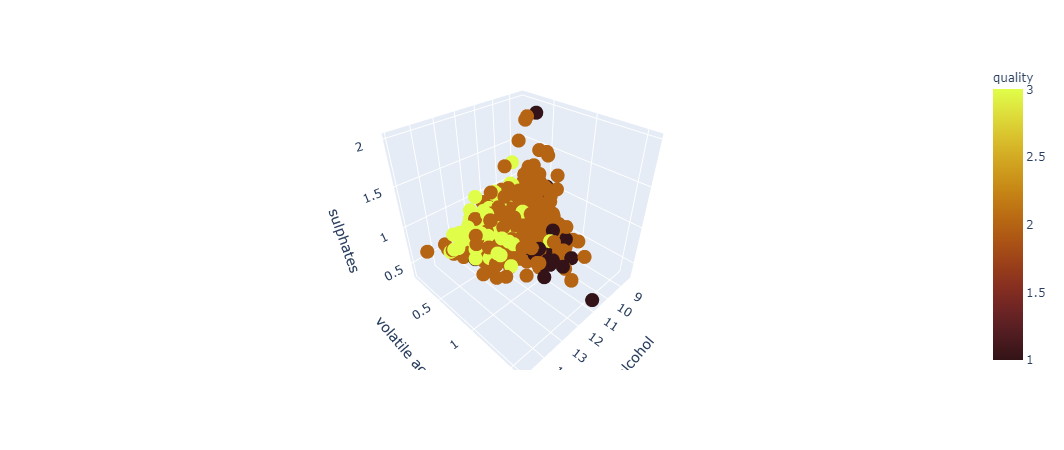

In [35]:
import plotly.express as px
fig = px.scatter_3d(dataset, x='alcohol',
                    y='volatile acidity', 
                    z='sulphates', 
                   color='quality', 
       color_continuous_scale='solar'
       )
iplot(fig)

# 2-Machine Learning Part

In [36]:
X = dataset.iloc[:,0:-1].copy()
Y = dataset.iloc[:,-1].copy()
Y=Y.values

<a id="8"></a><br>
## Feature Selection

In [37]:
import statsmodels.api as sm
x=sm.add_constant(X)
y=Y.copy()
results=sm.OLS(Y,x).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.229
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     42.78
Date:                Mon, 21 Feb 2022   Prob (F-statistic):           9.53e-82
Time:                        19:12:25   Log-Likelihood:                -624.77
No. Observations:                1599   AIC:                             1274.
Df Residuals:                    1587   BIC:                             1338.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   15.6745 

In [38]:
X.drop(['citric acid','free sulfur dioxide'],axis=1,inplace=True) #These features are nearly useless
x=sm.add_constant(X) 
y=Y.copy()
results=sm.OLS(Y,x).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.229
Model:                            OLS   Adj. R-squared:                  0.224
Method:                 Least Squares   F-statistic:                     52.35
Date:                Mon, 21 Feb 2022   Prob (F-statistic):           1.82e-83
Time:                        19:12:25   Log-Likelihood:                -624.77
No. Observations:                1599   AIC:                             1270.
Df Residuals:                    1589   BIC:                             1323.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   15.6970 

As you see, the values of F-statistics and Adj-R have increased. Which means model is better now.

<a id="10"></a><br>
## Cross Validation

In [39]:
from sklearn import model_selection
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.2, random_state=42)


In [40]:
#Standardizing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [41]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA,KernelPCA
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from xgboost import XGBClassifier

In [42]:
models = []
models.append(('Logistic Regression', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('K-NN', KNeighborsClassifier()))
models.append(('Naive Bayes', GaussianNB()))
models.append(('Decision Tree (CART)',DecisionTreeClassifier())) 
models.append(('AdaBoostClassifier', AdaBoostClassifier()))
models.append(('SVC', SVC(kernel = 'rbf', random_state = 42)))
models.append(('BaggingClassifier', BaggingClassifier()))
models.append(('RandomForestClassifier', RandomForestClassifier())) 
models.append(('XGBoost', XGBClassifier(n_estimators=200)))

In [43]:
from sklearn.metrics import classification_report
np.random.seed(123) #To get the same results

for name, model in models:
    model = model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    from sklearn import metrics
    print(name," --> Accuracy: ",(metrics.accuracy_score(Y_test, Y_pred)*100),"%")
    report = classification_report(Y_test, Y_pred)
    print(report)

Logistic Regression  --> Accuracy:  82.8125 %
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        11
           2       0.85      0.96      0.90       262
           3       0.57      0.28      0.37        47

    accuracy                           0.83       320
   macro avg       0.47      0.41      0.42       320
weighted avg       0.78      0.83      0.79       320

LDA  --> Accuracy:  81.5625 %
              precision    recall  f1-score   support

           1       1.00      0.09      0.17        11
           2       0.86      0.93      0.89       262
           3       0.47      0.36      0.41        47

    accuracy                           0.82       320
   macro avg       0.78      0.46      0.49       320
weighted avg       0.81      0.82      0.80       320

K-NN  --> Accuracy:  83.75 %
              precision    recall  f1-score   support

           1       0.50      0.18      0.27        11
           2       0.87 

Results of Bagging Classifier and Random Forest Classifier are so close. 

Let's try K-Fold Cross Validation with 10 iterations to make final decision.

In [44]:
from sklearn.model_selection import cross_val_score
Bagging_Classifier=BaggingClassifier()
Bagging_Accuracies=cross_val_score(estimator=Bagging_Classifier,X=X,y=Y,cv=10,n_jobs=-1)

RandomForest_Classifier=RandomForestClassifier()
RandomForest_Accuricies=cross_val_score(estimator=RandomForest_Classifier,X=X,y=Y,cv=10,n_jobs=-1)

final_results=pd.DataFrame(index=['Results'],columns=['Bagging Classifier','Random Forest Classifier'],data=[[Bagging_Accuracies.mean(),RandomForest_Accuricies.mean()]])
final_results

,Bagging Classifier,Random Forest Classifier
Results,0.821757,0.831156


According to these results, RandomForestClassifier is the best model for this dataset.